In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
df = pd.read_csv('isone_data_train.csv', parse_dates=['Date'])

In [3]:
df.head()

,Date,HE,MWh
0,2018-12-16,1,11601.94
1,2018-12-16,2,11539.70
2,2018-12-16,3,11287.14
3,2018-12-16,4,11212.09
4,2018-12-16,5,11289.47


In [4]:
df['HE'] = df['HE'].replace(['24'], '0')
df.head()

,Date,HE,MWh
0,2018-12-16,1,11601.94
1,2018-12-16,2,11539.70
2,2018-12-16,3,11287.14
3,2018-12-16,4,11212.09
4,2018-12-16,5,11289.47


In [5]:
from datetime import datetime

In [6]:
s = df['Date'].astype(str).str.zfill(2) + ' ' + df['HE'].astype(str).str.zfill(2)
df['Datetime'] = pd.to_datetime(s, errors='ignore', format = '%m%d%Y%H')
df.head()

,Date,HE,MWh,Datetime
0,2018-12-16,1,11601.94,2018-12-16 01
1,2018-12-16,2,11539.70,2018-12-16 02
2,2018-12-16,3,11287.14,2018-12-16 03
3,2018-12-16,4,11212.09,2018-12-16 04
4,2018-12-16,5,11289.47,2018-12-16 05


In [7]:
df = df.drop(columns ={'Date','HE'}, axis =1)

In [8]:
# Extract all Data Like Year Month Day Time etc
dataset = df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.week
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(1)

C:\Users\drash\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1213: UnknownTimezoneWarning: tzname X identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


,MWh,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2018-12-16 01:00:00,11601.94,12,2018,2018-12-16,01:00:00,50,Sunday


In [48]:
dataset.head()

,MWh,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2018-12-16 01:00:00,11601.94,12,2018,2018-12-16,01:00:00,50,Sunday
2018-12-16 02:00:00,11539.70,12,2018,2018-12-16,02:00:00,50,Sunday
2018-12-16 03:00:00,11287.14,12,2018,2018-12-16,03:00:00,50,Sunday
2018-12-16 04:00:00,11212.09,12,2018,2018-12-16,04:00:00,50,Sunday
2018-12-16 05:00:00,11289.47,12,2018,2018-12-16,05:00:00,50,Sunday


In [10]:
# How many Unique Year do we Have in Dataset 
print(df.Year.unique(),"\n")
print("Total Number of Unique Year", df.Year.nunique(), "\n")


[2018 2019 2020] 

Total Number of Unique Year 3 



No handles with labels found to put in legend.


Text(0.5, 1.0, 'Energy Consumption According to Year')

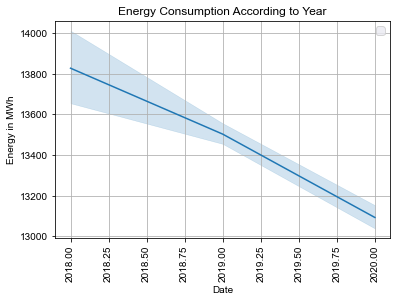

In [11]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Year"], y=dataset["MWh"], data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.xlabel("Date")
plt.ylabel("Energy in MWh")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption According to Year")

No handles with labels found to put in legend.


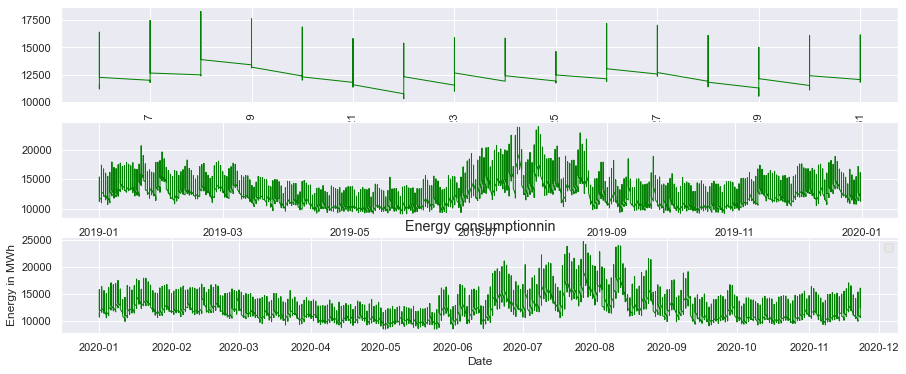

In [12]:

fig = plt.figure()

ax1= fig.add_subplot(311)
ax2= fig.add_subplot(312)
ax3= fig.add_subplot(313)


style.use('ggplot')

y_2018 = dataset["2018"]["MWh"].to_list()
x_2018 = dataset["2018"]["Date"].to_list()
ax1.plot(x_2018,y_2018, color="green", linewidth=1)


y_2019 = dataset["2019"]["MWh"].to_list()
x_2019 = dataset["2019"]["Date"].to_list()
ax2.plot(x_2019, y_2019, color="green", linewidth=1)


y_2020 = dataset["2020"]["MWh"].to_list()
x_2020 = dataset["2020"]["Date"].to_list()
ax3.plot(x_2020, y_2020, color="green", linewidth=1)


plt.rcParams["figure.figsize"] = (18,8)
plt.title("Energy consumptionnin")
plt.xlabel("Date")
plt.ylabel("Energy in MWh")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

Text(0.5, 1.0, 'Energy Distribution')

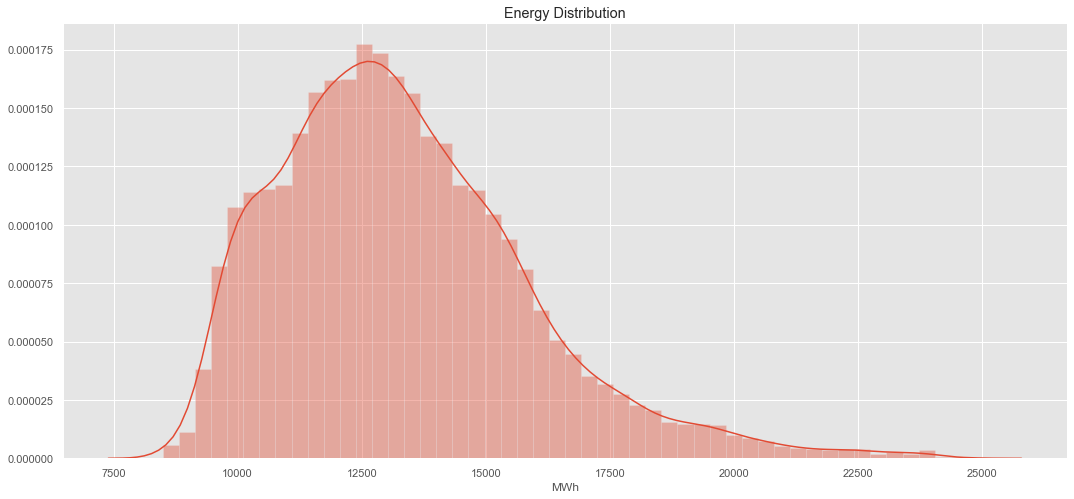

In [13]:
sns.distplot(dataset["MWh"])
plt.title("Energy Distribution")

In [14]:
pd.plotting.register_matplotlib_converters()

No handles with labels found to put in legend.


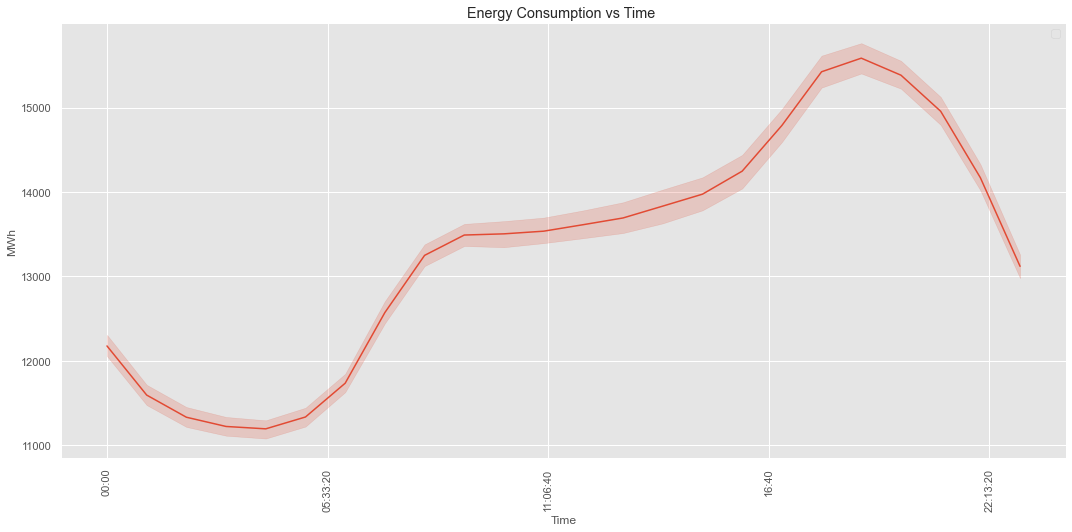

In [15]:
fig = plt.figure()
ax1= fig.add_subplot(111)

sns.lineplot(x=dataset["Time"],y=dataset["MWh"], data=df)
plt.title("Energy Consumption vs Time ")
plt.xlabel("Time")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

In [16]:
df1 = pd.read_csv('isone_data_test.csv', parse_dates=['Date'])

In [17]:
df1.head()

,Date,HE,MWh
0,2020-11-24,1,12153.70
1,2020-11-24,2,11842.58
2,2020-11-24,3,11696.74
3,2020-11-24,4,11729.40
4,2020-11-24,5,12078.10


In [18]:
df1['HE'] = df1['HE'].replace(24,0)

In [19]:
df1.head()

,Date,HE,MWh
0,2020-11-24,1,12153.70
1,2020-11-24,2,11842.58
2,2020-11-24,3,11696.74
3,2020-11-24,4,11729.40
4,2020-11-24,5,12078.10


In [20]:
p = df1['Date'].astype(str).str.zfill(2) + ' ' + df1['HE'].astype(str).str.zfill(2)
df1['Datetime'] = pd.to_datetime(p, errors='ignore', format = '%m%d%Y%H')
df1.head()

,Date,HE,MWh,Datetime
0,2020-11-24,1,12153.70,2020-11-24 01
1,2020-11-24,2,11842.58,2020-11-24 02
2,2020-11-24,3,11696.74,2020-11-24 03
3,2020-11-24,4,11729.40,2020-11-24 04
4,2020-11-24,5,12078.10,2020-11-24 05


In [21]:
# Extract all Data Like Year Month Day Time etc
dataset1 = df1
dataset1["Month"] = pd.to_datetime(df1["Datetime"]).dt.month
dataset1["Year"] = pd.to_datetime(df1["Datetime"]).dt.year
dataset1["Date"] = pd.to_datetime(df1["Datetime"]).dt.date
dataset1["Time"] = pd.to_datetime(df1["Datetime"]).dt.time
dataset1["Week"] = pd.to_datetime(df1["Datetime"]).dt.week
dataset1["Day"] = pd.to_datetime(df1["Datetime"]).dt.day_name()
dataset1 = df1.set_index("Datetime")
dataset1.index = pd.to_datetime(dataset1.index)
dataset1.head(1)

,Date,HE,MWh,Month,Year,Time,Week,Day
Datetime,,,,,,,,
2020-11-24 01:00:00,2020-11-24,1,12153.7,11,2020,01:00:00,48,Tuesday


In [49]:
dataset1 = dataset1.drop(columns={'Date','HE'})
dataset1.head()

,MWh,Month,Year,Time,Week,Day
Datetime,,,,,,
2020-11-24 01:00:00,12153.70,11,2020,01:00:00,48,Tuesday
2020-11-24 02:00:00,11842.58,11,2020,02:00:00,48,Tuesday
2020-11-24 03:00:00,11696.74,11,2020,03:00:00,48,Tuesday
2020-11-24 04:00:00,11729.40,11,2020,04:00:00,48,Tuesday
2020-11-24 05:00:00,12078.10,11,2020,05:00:00,48,Tuesday


In [50]:
dataset = dataset.drop(columns={'Date'})
dataset.head()

,MWh,Month,Year,Time,Week,Day
Datetime,,,,,,
2018-12-16 01:00:00,11601.94,12,2018,01:00:00,50,Sunday
2018-12-16 02:00:00,11539.70,12,2018,02:00:00,50,Sunday
2018-12-16 03:00:00,11287.14,12,2018,03:00:00,50,Sunday
2018-12-16 04:00:00,11212.09,12,2018,04:00:00,50,Sunday
2018-12-16 05:00:00,11289.47,12,2018,05:00:00,50,Sunday


In [51]:
newdataset = dataset

In [52]:
print("Old Dataset ",dataset.shape )
print("New  Dataset ",newdataset.shape )

Old Dataset  (17013, 6)
New  Dataset  (17013, 6)


In [54]:
training_set = newdataset
type(training_set.values)
training_set = newdataset.iloc[:,0:1]
training_set

,MWh
Datetime,
2018-12-16 01:00:00,11601.94
2018-12-16 02:00:00,11539.70
2018-12-16 03:00:00,11287.14
2018-12-16 04:00:00,11212.09
2018-12-16 05:00:00,11289.47
...,...
2020-11-23 20:00:00,15234.81
2020-11-23 21:00:00,14522.04
2020-11-23 22:00:00,13646.58


In [55]:
testset = dataset1
testset = testset.iloc[:,0:1]
testset

,MWh
Datetime,
2020-11-24 01:00:00,12153.70
2020-11-24 02:00:00,11842.58
2020-11-24 03:00:00,11696.74
2020-11-24 04:00:00,11729.40
2020-11-24 05:00:00,12078.10
...,...
2021-01-18 20:00:00,15584.90
2021-01-18 21:00:00,14909.69
2021-01-18 22:00:00,14047.55


In [56]:
print("Training Set Shape ", training_set.shape)
print("Test Set Shape ", testset.shape)

Training Set Shape  (17013, 1)
Test Set Shape  (1336, 1)


In [58]:
sc = MinMaxScaler(feature_range=(0,1))

In [59]:
train = sc.fit_transform(training_set)
train.shape

(17013, 1)

In [60]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END 
for i in range(1336, train.shape[0]):
    
    # X_Train 0-59 
    X_Train.append(train[i-1336:i])
    
    # Y Would be 60 th Value based on past 60 Values 
    Y_Train.append(train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(15677, 1336, 1)
(15677, 1)


In [61]:
# Shape should be Number of [Datapoints , Steps , 1 )
# we convert into 3-d Vector or #rd Dimesnsion
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(15677, 1336, 1)

In [34]:
import tensorflow as tf
from tensorflow import keras

In [35]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.layers import Dense, Dropout

In [62]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [76]:
regressor.fit(X_Train, Y_Train, epochs = 3, batch_size = 32)

Epoch 1/3
490/490 [==============================] - 850s 2s/step - loss: 0.0052
Epoch 2/3
490/490 [==============================] - 945s 2s/step - loss: 0.0043
Epoch 3/3
490/490 [==============================] - 1034s 2s/step - loss: 0.0037


In [77]:
testset.shape

(1336, 1)

In [78]:
newdataset['MWh']= np.array(newdataset['MWh'])

In [79]:
newdataset

,MWh,Month,Year,Time,Week,Day
Datetime,,,,,,
2018-12-16 01:00:00,11601.94,12,2018,01:00:00,50,Sunday
2018-12-16 02:00:00,11539.70,12,2018,02:00:00,50,Sunday
2018-12-16 03:00:00,11287.14,12,2018,03:00:00,50,Sunday
2018-12-16 04:00:00,11212.09,12,2018,04:00:00,50,Sunday
2018-12-16 05:00:00,11289.47,12,2018,05:00:00,50,Sunday
...,...,...,...,...,...,...
2020-11-23 20:00:00,15234.81,11,2020,20:00:00,48,Monday
2020-11-23 21:00:00,14522.04,11,2020,21:00:00,48,Monday
2020-11-23 22:00:00,13646.58,11,2020,22:00:00,48,Monday


In [80]:
testset.head(3)

,MWh
Datetime,
2020-11-24 01:00:00,12153.70
2020-11-24 02:00:00,11842.58
2020-11-24 03:00:00,11696.74


In [81]:
Df_Total = pd.concat((newdataset[["MWh"]], testset[["MWh"]]), axis=0)

In [82]:
Df_Total.shape

(18349, 1)

In [83]:
inputs = Df_Total[len(Df_Total) - len(testset) - 1336:].values
inputs.shape

(2672, 1)

In [84]:
# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(1336, 2672):
    X_test.append(inputs[i-1336:i])
    
# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model 
predicted_stock_price = regressor.predict(X_test)

# Do inverse Transformation to get Values 
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [85]:
True_MWh = testset["MWh"].to_list()
Predicted_MWh  = predicted_stock_price
dates = testset.index.to_list()

In [86]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "True_MWh": True_MWh,
    "Predicted_MWh":[x[0] for x in Predicted_MWh]
})

In [87]:
Machine_Df

,Date,True_MWh,Predicted_MWh
0,2020-11-24 01:00:00,12153.70,11257.322266
1,2020-11-24 02:00:00,11842.58,10982.730469
2,2020-11-24 03:00:00,11696.74,11036.007812
3,2020-11-24 04:00:00,11729.40,11362.847656
4,2020-11-24 05:00:00,12078.10,11868.252930
...,...,...,...
1331,2021-01-18 20:00:00,15584.90,15178.026367
1332,2021-01-18 21:00:00,14909.69,14805.062500
1333,2021-01-18 22:00:00,14047.55,14088.513672
1334,2021-01-18 23:00:00,13080.80,13196.301758


In [88]:
True_MWh = testset["MWh"].to_list()
Predicted_MWh  = [x[0] for x in Predicted_MWh ]
dates = testset.index.to_list()

No handles with labels found to put in legend.


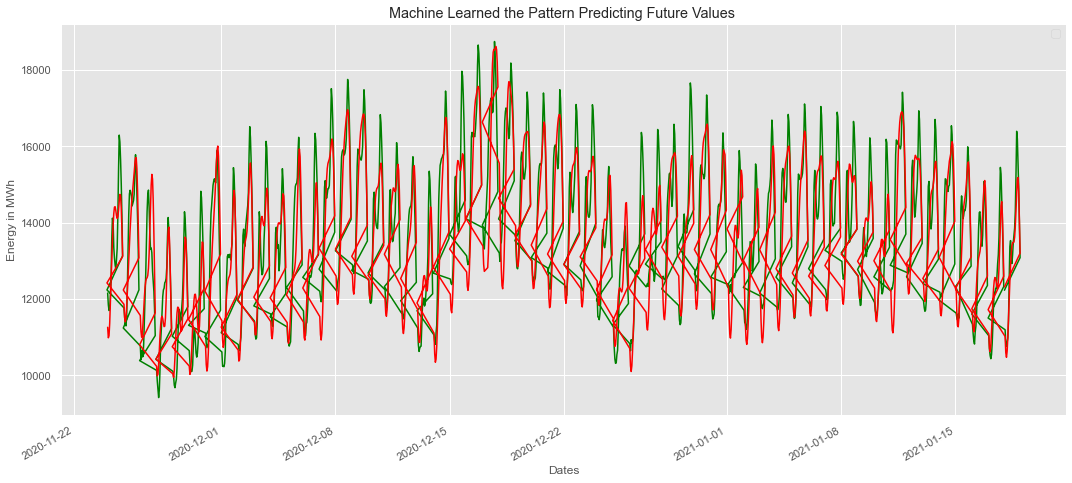

In [89]:
fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = True_MWh

y1 = Predicted_MWh

plt.plot(x,y, color="green")
plt.plot(x,y1, color="red")
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Energy in MWh")
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.legend()